![](https://pickyourtrail.com/blog/wp-content/uploads/2016/08/20140204000881966198-original.jpg)

-------------------

<div style="background-color:Blue; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Table of Contents </h1>
</div>

- Introduction
- Data Preparation & Data Cleaning
- Exploratory Data Analysis & Visulaiztion
- Asking & Answering Questions
- Conclusion

<div style="background-color:Gold; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Introduction </h1>
</div>

### Introduction
The Olympics is a prestigious international sporting event that brings together athletes from across the globe to compete in a wide variety of disciplines. With its origins dating back to ancient Greece, the modern Olympics showcase over 30 different sports, ranging from traditional events like athletics, swimming, and gymnastics to newer additions such as skateboarding, surfing, and esports. The Games are held every four years, alternating between the Summer and Winter Olympics, and serve as a celebration of athletic excellence, cultural exchange, and global unity. Each sport is divided into multiple events, and athletes compete for gold, silver, and bronze medals, making the Olympics a symbol of dedication, international cooperation, and the spirit of fair competition.

This notebook analyzes medal trends across various disciplines in both the Summer and Winter Olympic Games over the years. The analysis is conducted using Python and several of its powerful libraries to explore the data, gain insights, and effectively communicate findings.

The dataset is taken from 


Libraries used in project:

- **pandas**: A core library for data manipulation and analysis, offering data structures like DataFrames for handling structured data efficiently.

- **matplotlib**: A widely-used library for creating static, animated, and interactive visualizations.

- **seaborn**: Built on top of matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

- **plotly**: A library for building interactive and dynamic visualizations.

- **altair**: A declarative statistical visualization library that's great for building clean and concise charts.

- **scikit-learn**: A comprehensive library for building machine learning models and workflows, including tools for classification, regression, clustering, and more.

<div style="background-color:Black; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Data Preparation & Data Cleaning </h1>
</div>

### Load Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import random
import seaborn as sns
import math

### Data Import

In [2]:
# Load the CSV file into a DataFrame
file_path = '/kaggle/input/olympics-overall/athlete_events.csv'
df = pd.read_csv(file_path)

# Display the first and end few rows of the DataFrame, Show Basic information and preview of the dataset
df.shape, df.columns, df.head(), df.tail() 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


((271116, 15),
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
        'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
       dtype='object'),
    ID                      Name Sex   Age  Height  Weight            Team  \
 0   1                 A Dijiang   M  24.0   180.0    80.0           China   
 1   2                  A Lamusi   M  23.0   170.0    60.0           China   
 2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
 3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
 4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
 
    NOC        Games  Year  Season       City          Sport  \
 0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
 1  CHN  2012 Summer  2012  Summer     London           Judo   
 2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
 3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
 4  NED  1988 Winter  1988  W

### Data Description/Summary

#### The dataset contains 271,116 Olympic athlete records with the following relevant columns: 

- Demographic: Age, Height, Weight, Gender, NOC (National Olympic Committee)
- Calendar: Year, Games, Season
- Discipline: Sport, Event
- Medals: Whether the athlete/team won a medal (Gold, Silver, Bronze)

### Checking Missing Values & Duplicate Value

In [3]:
print(f'---------------------------------------------------------------------------------------')
print(f'Data Size: {df.shape}')
print(f'---------------------------------------------------------------------------------------')
print(f'Data Description: {df.describe()}')
print(f'---------------------------------------------------------------------------------------')
print(f'Data Duplicates: {df.duplicated()}')
print(f'---------------------------------------------------------------------------------------')
print(f'Null values : {df.isnull().sum()}')

---------------------------------------------------------------------------------------
Data Size: (271116, 15)
---------------------------------------------------------------------------------------
Data Description:                   ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  

##### The dataset consists of 271,116 entries, each representing an athlete's participation in a specific event.  There are 15 columns in total, with data types including integers, floats, and strings. Not all fields are complete; for instance, the "Age", "Height", and "Weight" columns have missing values, and the "Medal" column is often empty when no medal was won.

<div style="background-color:Green; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Exploratory Data Analysis & Visualization </h1>
</div>

In [4]:
# Filter only rows where a medal was awarded
medalists_df = df[df['Medal'].notnull()]

# Group by country (Team) and Sport, then count medals
country_sport_medals = medalists_df.groupby(['Team', 'Sport'])['Medal'].count().unstack(fill_value=0)

# Show a preview of the medal count matrix
country_sport_medals.head()

Sport,Aeronautics,Alpine Skiing,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Basque Pelota,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
A North American Team,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ali-Baba II,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amateur Athletic Association,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We now have a country-by-sport matrix showing how many medals each country has won in each discipline. This sets the stage to evaluate patterns and correlations.

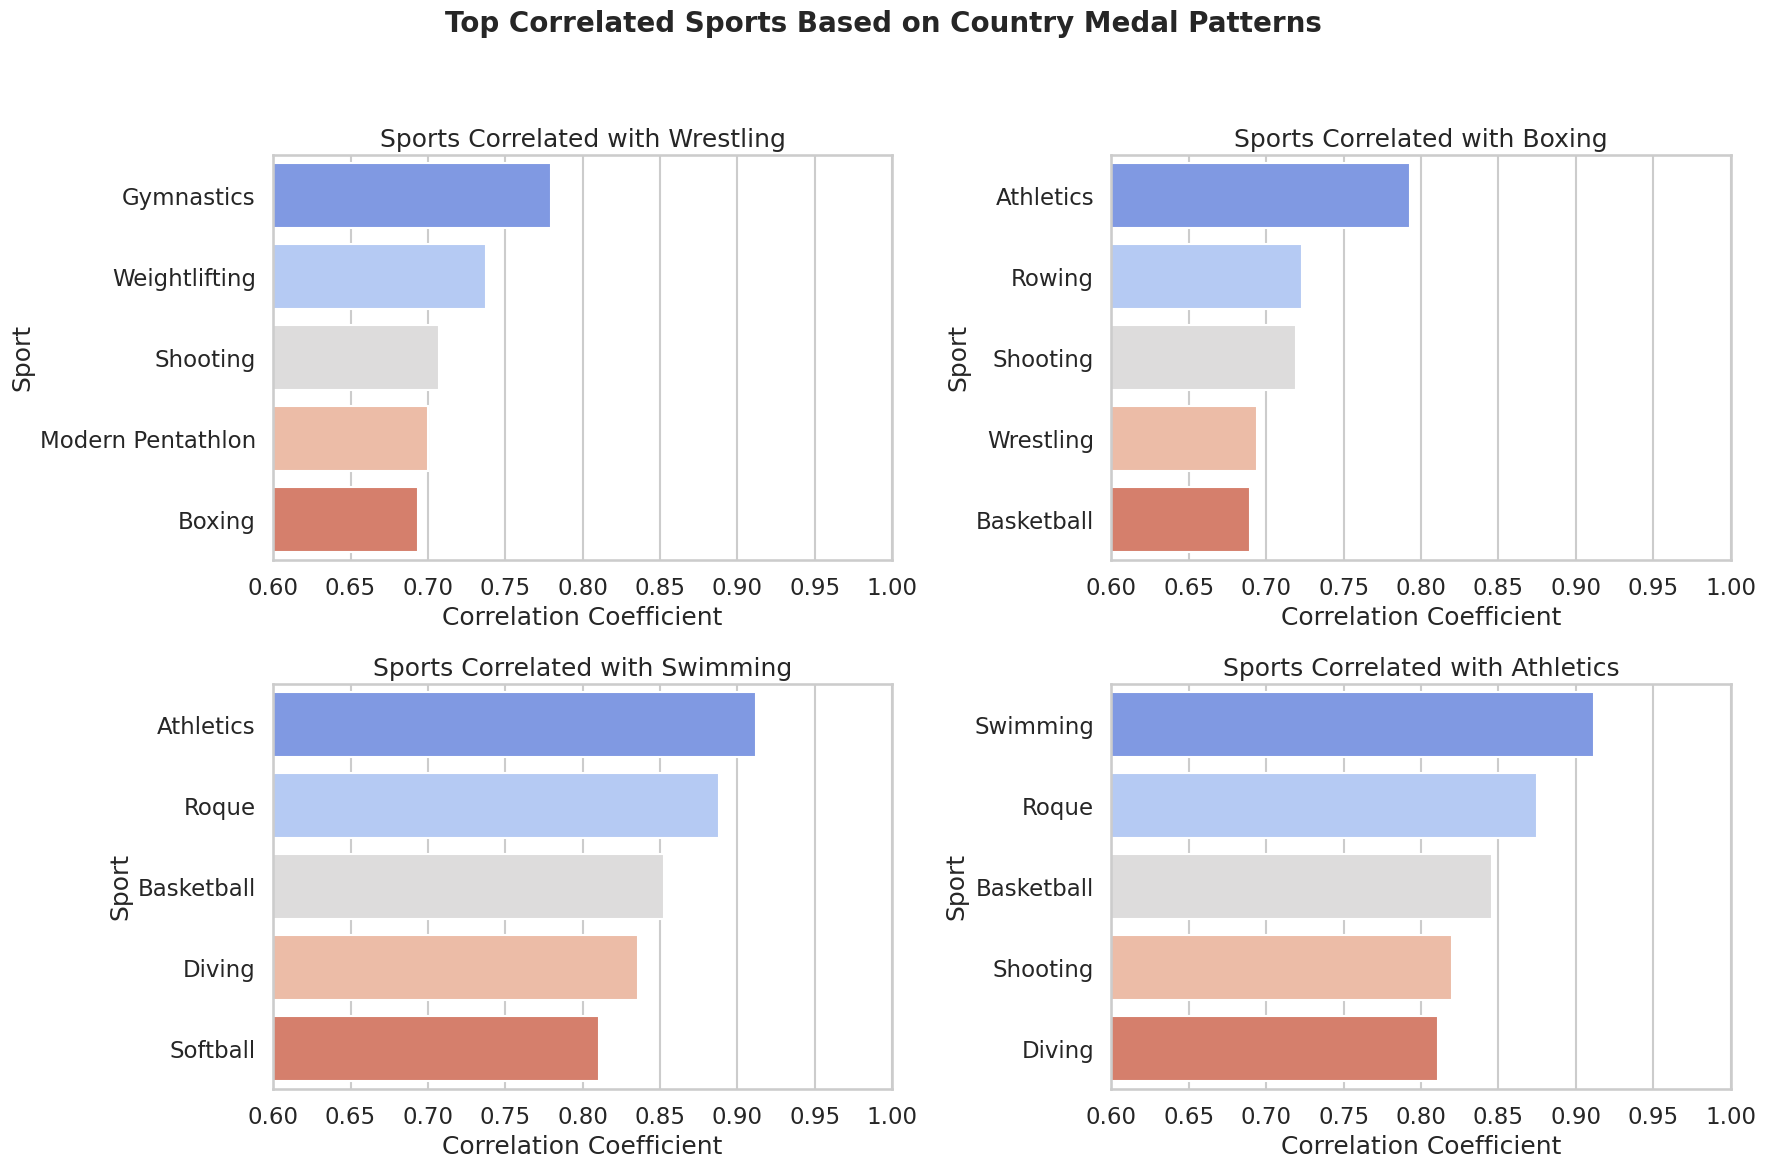

{'Wrestling': Sport
 Gymnastics           0.779706
 Weightlifting        0.737374
 Shooting             0.706952
 Modern Pentathlon    0.699763
 Boxing               0.693783
 Name: Wrestling, dtype: float64,
 'Boxing': Sport
 Athletics     0.793086
 Rowing        0.722871
 Shooting      0.719075
 Wrestling     0.693783
 Basketball    0.689745
 Name: Boxing, dtype: float64,
 'Swimming': Sport
 Athletics     0.912043
 Roque         0.888080
 Basketball    0.852676
 Diving        0.835638
 Softball      0.810736
 Name: Swimming, dtype: float64,
 'Athletics': Sport
 Swimming      0.912043
 Roque         0.875167
 Basketball    0.845888
 Shooting      0.820351
 Diving        0.811083
 Name: Athletics, dtype: float64}

In [5]:
# Filter for medal winners
medalists_df = df[df['Medal'].notnull()]

# Create a pivot table: rows = country, columns = sport, values = medal counts
country_sport_medals = medalists_df.groupby(['Team', 'Sport']).size().unstack(fill_value=0)

# Transpose for sport correlation analysis
sport_country_matrix = country_sport_medals.T

# Compute correlation matrix between sports
sport_correlation_matrix = sport_country_matrix.T.corr()

# Define target sports
target_sports = ['Wrestling', 'Boxing', 'Swimming', 'Athletics']

# Filter only available sports
available_sports = [sport for sport in target_sports if sport in sport_country_matrix.index]

# Compute top correlated sports for each available target sport
correlated_sports = {}
for sport in available_sports:
    if sport in sport_correlation_matrix.columns:
        correlations = sport_correlation_matrix[sport].sort_values(ascending=False)
        correlated_sports[sport] = correlations[1:6]  # exclude self-correlation

# Plotting
sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top Correlated Sports Based on Country Medal Patterns', fontsize=20, weight='bold')

axes = axes.flatten()
for i, sport in enumerate(correlated_sports):
    sns.barplot(x=correlated_sports[sport].values,
                y=correlated_sports[sport].index,
                ax=axes[i],
                palette='coolwarm')
    axes[i].set_title(f'Sports Correlated with {sport}')
    axes[i].set_xlabel('Correlation Coefficient')
    axes[i].set_xlim(0.6, 1.0)

# Final layout tweaks
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Return the dictionary of correlated sports for reference
correlated_sports

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


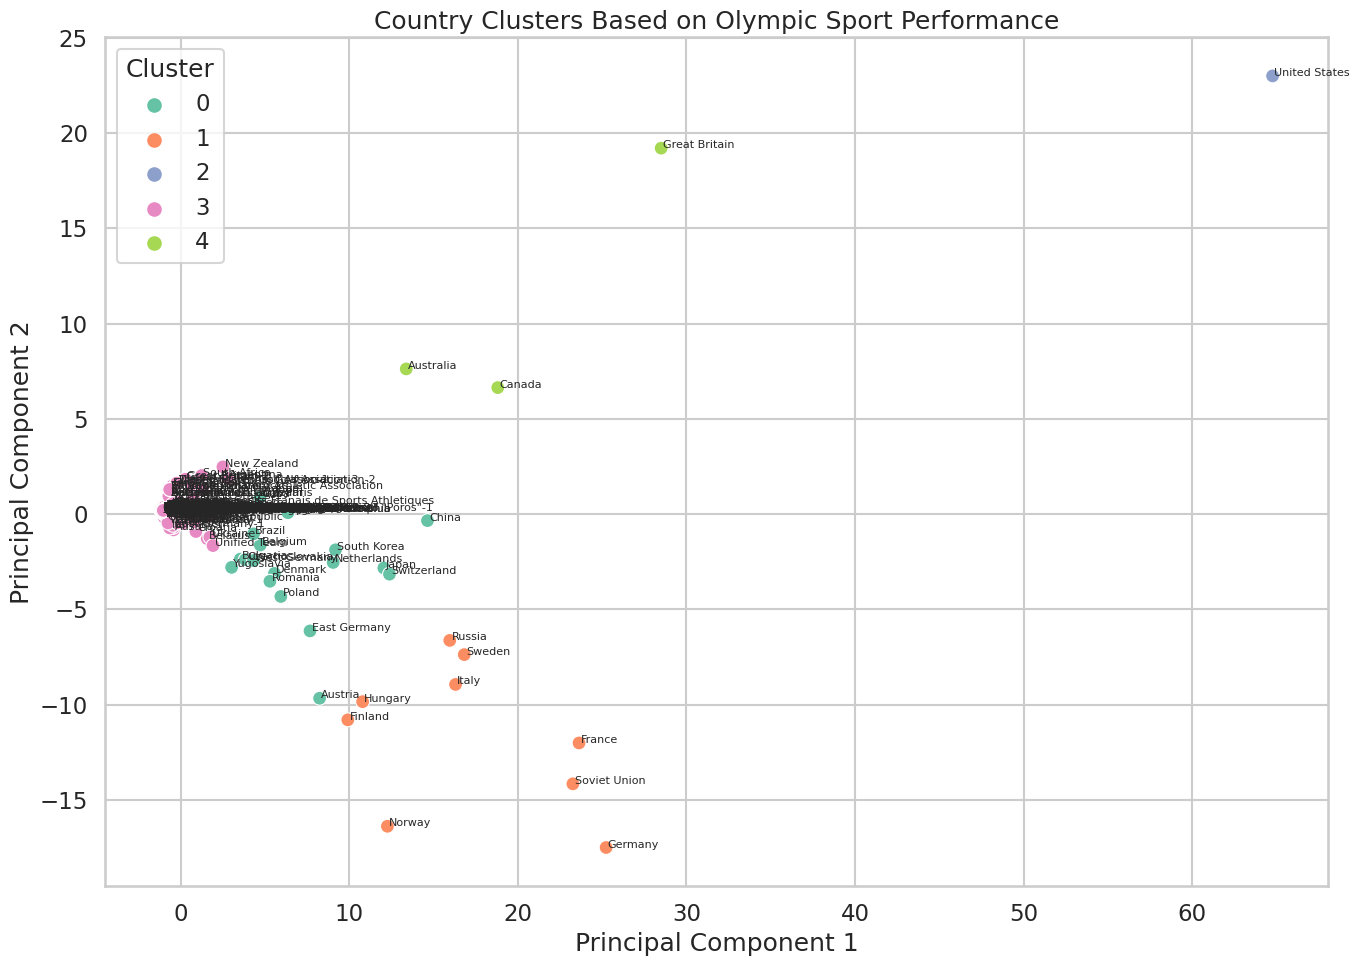

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_sport_medals)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Create a DataFrame for plotting
cluster_df = pd.DataFrame({
    'Country': country_sport_medals.index,
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': clusters
})

# Plot the clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
for i in range(len(cluster_df)):
    plt.text(cluster_df['PCA1'][i]+0.1, cluster_df['PCA2'][i], cluster_df['Country'][i], fontsize=8)
plt.title('Country Clusters Based on Olympic Sport Performance', fontsize=18)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

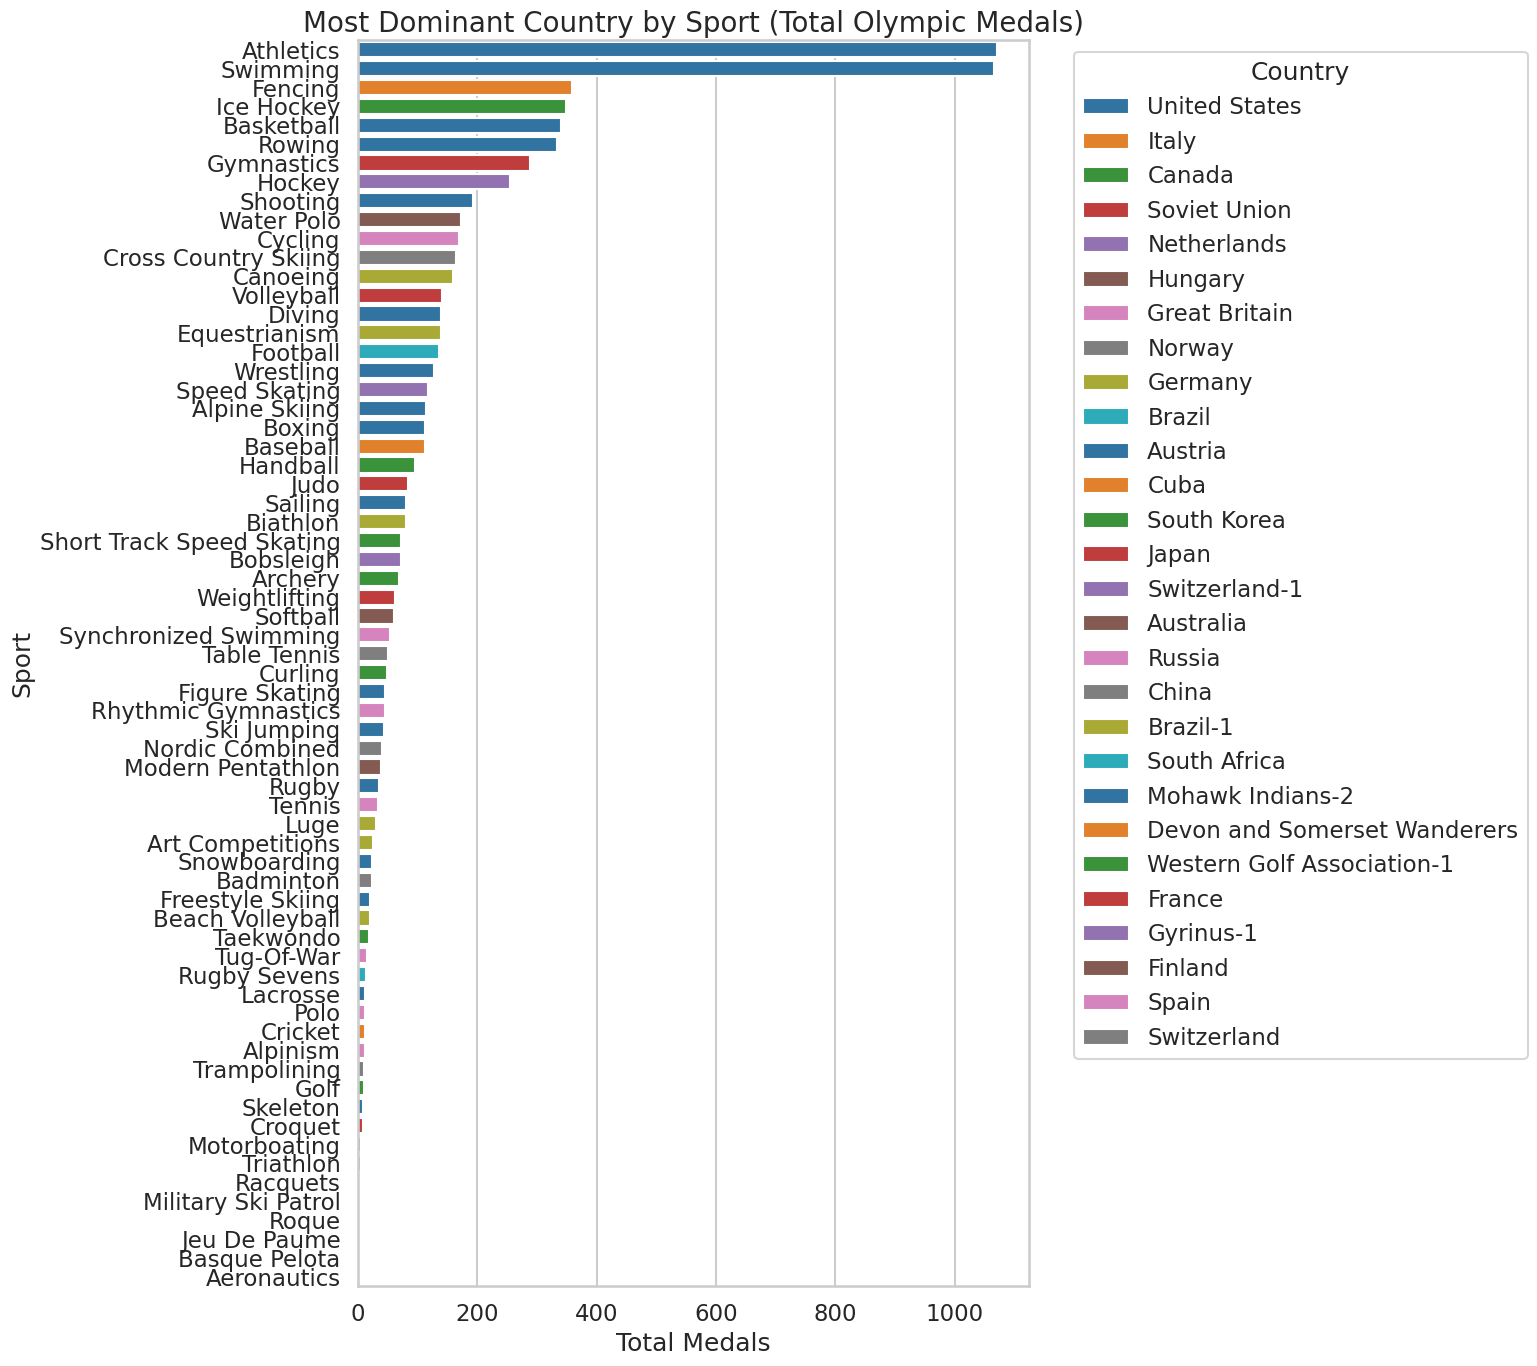

In [7]:
# For each sport, find the country with the highest medal count
dominant_countries = medalists_df.groupby(['Sport', 'Team'])['Medal'].count().reset_index()
dominant_by_sport = dominant_countries.sort_values('Medal', ascending=False).groupby('Sport').first().reset_index()

# Sort by most dominant medals overall for visualization
dominant_by_sport = dominant_by_sport.sort_values(by='Medal', ascending=False)

# Plot the data
plt.figure(figsize=(16, 14))
sns.barplot(data=dominant_by_sport, y='Sport', x='Medal', hue='Team', dodge=False, palette='tab10')
plt.title('Most Dominant Country by Sport (Total Olympic Medals)', fontsize=20)
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
# Filter only medal winners
medalists_df = df[df['Medal'].notnull()]

# Group by sport and country to count medals
dominant_countries = medalists_df.groupby(['Sport', 'Team'])['Medal'].count().reset_index()

# Find the top country for each sport
dominant_by_sport = dominant_countries.sort_values('Medal', ascending=False).groupby('Sport').first().reset_index()

# Create a table of dominant countries by sport
dominant_table = dominant_by_sport[['Sport', 'Team', 'Medal']]
dominant_table.columns = ['Sport', 'Dominant Country', 'Total Medals']

# Prepare data for map view: count how many sports each country dominates
dominance_count = dominant_table['Dominant Country'].value_counts().reset_index()
dominance_count.columns = ['Country', 'Number of Sports Dominated']

# Plot map using Plotly
fig_map = px.choropleth(dominance_count,
                        locations='Country',
                        locationmode='country names',
                        color='Number of Sports Dominated',
                        color_continuous_scale='Blues',
                        title='Number of Olympic Sports Dominated by Country')
fig_map.update_layout(geo=dict(showframe=False, showcoastlines=False))

dominant_table.head(), fig_map.show()

(              Sport Dominant Country  Total Medals
 0       Aeronautics      Switzerland             1
 1     Alpine Skiing          Austria           114
 2          Alpinism    Great Britain            12
 3           Archery      South Korea            69
 4  Art Competitions          Germany            26,
 None)

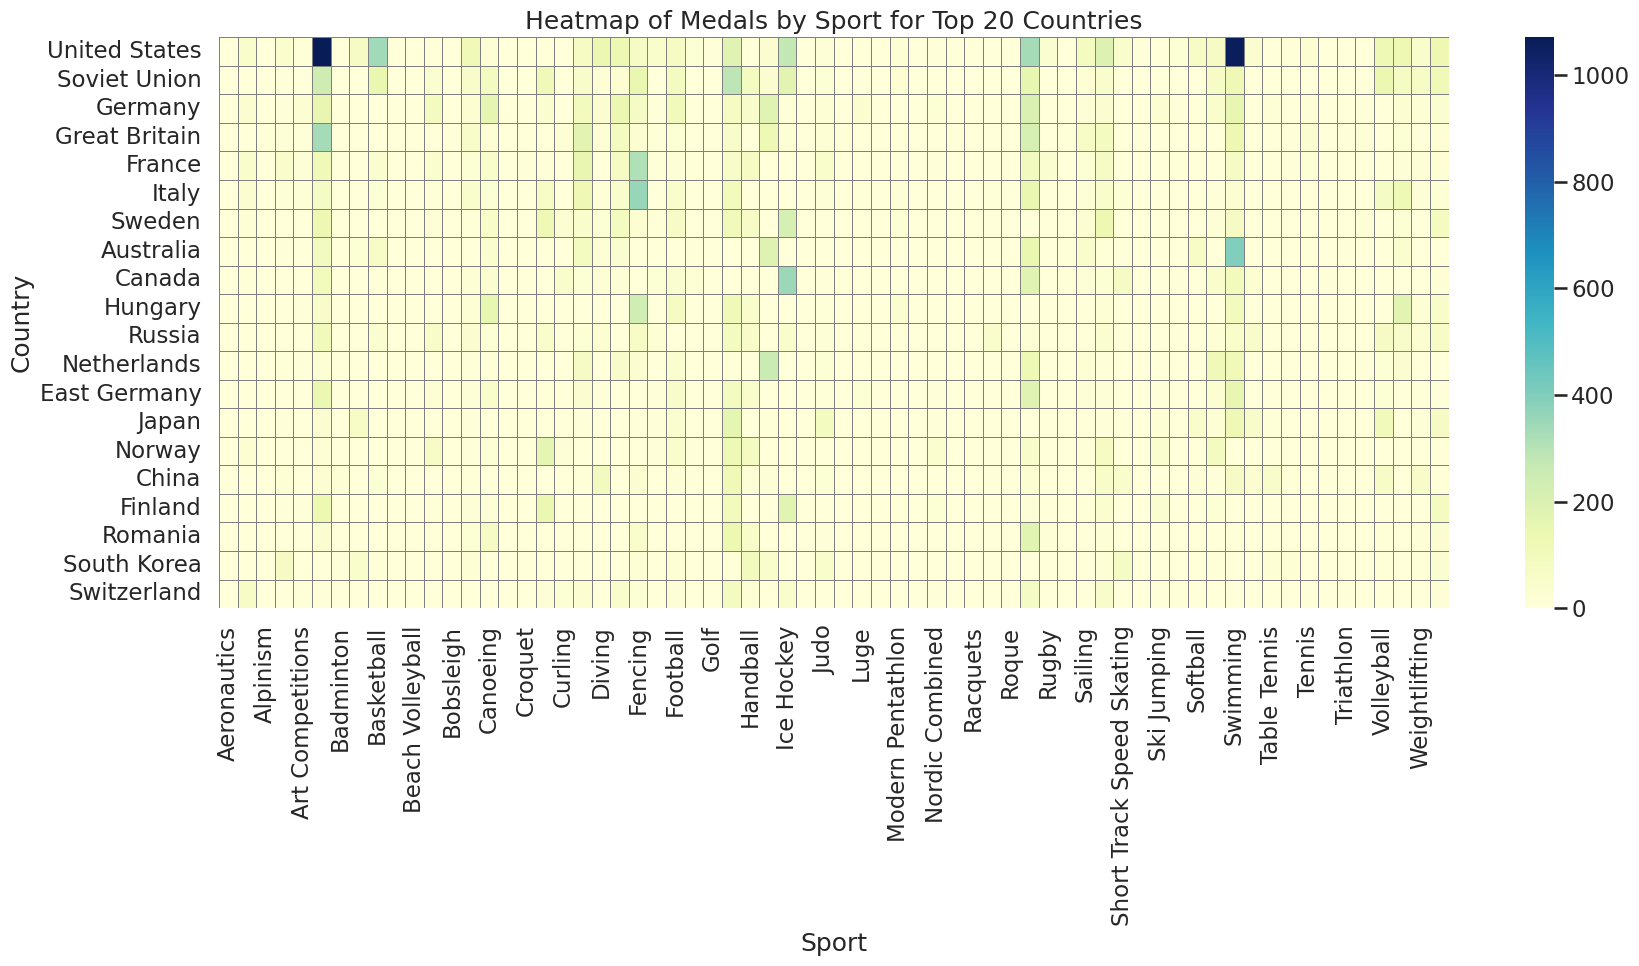

,Sport,Dominant Country,Total Medals
5,Athletics,United States,1071
54,Swimming,United States,1066
22,Fencing,Italy,359
30,Ice Hockey,Canada,348
8,Basketball,United States,341
43,Rowing,United States,333
27,Gymnastics,Soviet Union,288
29,Hockey,Netherlands,255
47,Shooting,United States,193
63,Water Polo,Hungary,172


In [9]:
# Display the full table of most dominant countries by sport
dominant_table_sorted = dominant_table.sort_values(by='Total Medals', ascending=False)

# Prepare data for heatmap
# Pivot the original medal data: rows = countries, columns = sports
heatmap_data = medalists_df.groupby(['Team', 'Sport'])['Medal'].count().unstack(fill_value=0)

# Select top 20 countries with most total medals across all sports
top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(20).index
top_heatmap_data = heatmap_data.loc[top_countries]

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(top_heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Medals by Sport for Top 20 Countries', fontsize=18)
plt.xlabel('Sport')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Show the top of the dominant table
dominant_table_sorted.head(10)

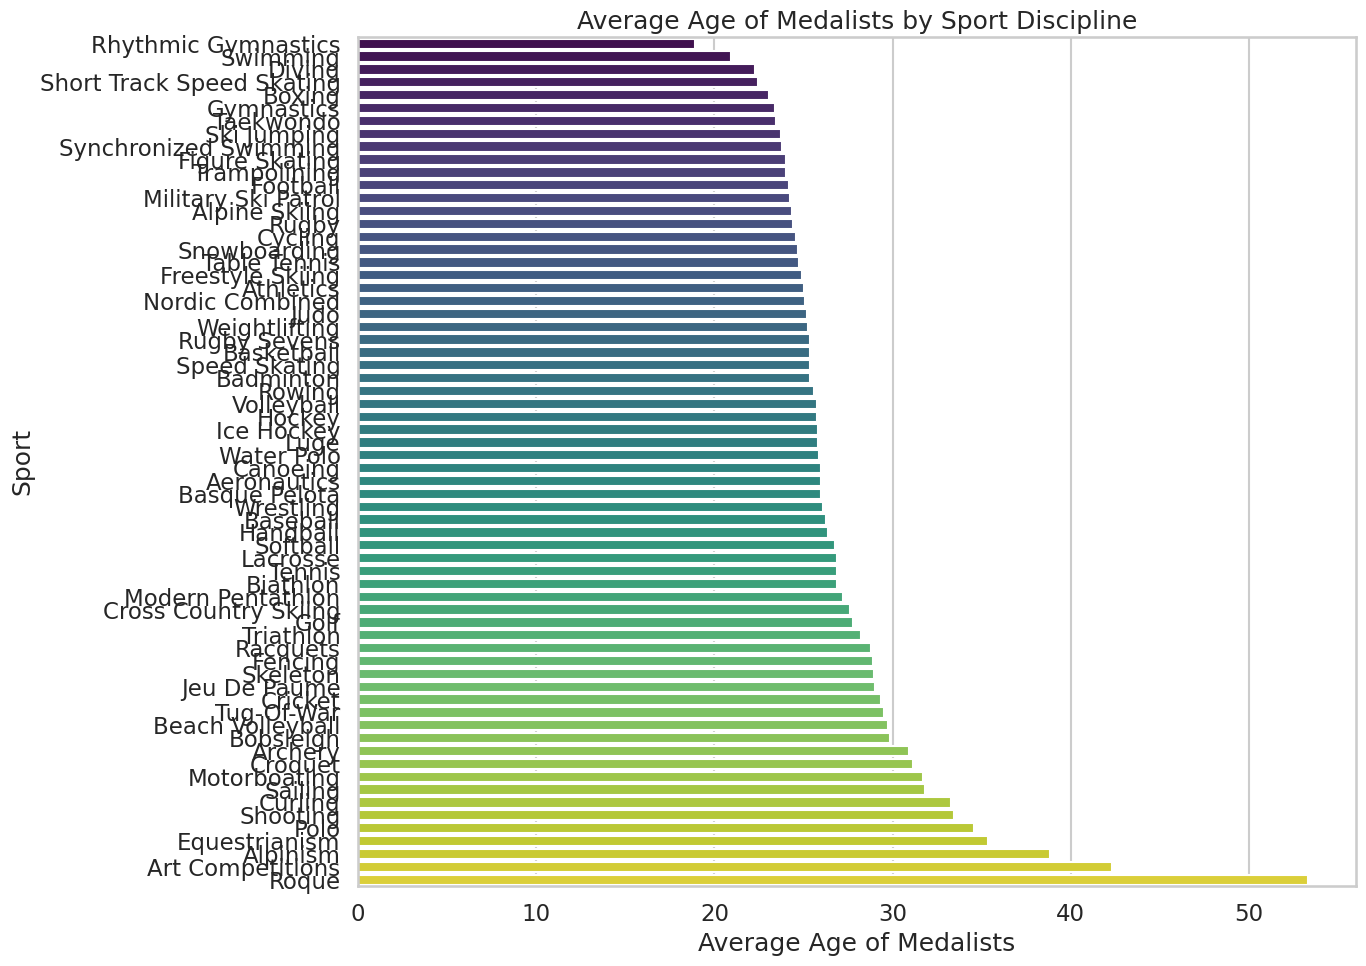

(Sport
 Rhythmic Gymnastics          18.931818
 Swimming                     20.923356
 Diving                       22.264775
 Short Track Speed Skating    22.429577
 Boxing                       23.058002
 Name: Age, dtype: float64,
 Sport
 Polo                34.584615
 Equestrianism       35.371728
 Alpinism            38.812500
 Art Competitions    42.328947
 Roque               53.333333
 Name: Age, dtype: float64)

In [10]:
# Group by Sport and calculate average age of medalists per sport
age_by_sport = medalists_df.groupby('Sport')['Age'].mean().dropna().sort_values()

# Plot the average age by sport
plt.figure(figsize=(14, 10))
sns.barplot(x=age_by_sport.values, y=age_by_sport.index, palette="viridis")
plt.xlabel('Average Age of Medalists')
plt.ylabel('Sport')
plt.title('Average Age of Medalists by Sport Discipline', fontsize=18)
plt.tight_layout()
plt.show()

# Show top and bottom 5 sports by average age
age_by_sport.head(5), age_by_sport.tail(5)

In [11]:
# Filter only medal winners
medalists_df = df[df['Medal'].notnull()]

# Count medals by country and medal type
medal_counts = medalists_df.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Add total medals column
medal_counts['Total'] = medal_counts.sum(axis=1)

# Sort by total medals
medal_counts_sorted = medal_counts.sort_values('Total', ascending=False)

# Display top 10 countries
medal_counts_sorted.head(10)

Medal,Bronze,Gold,Silver,Total
Team,,,,
United States,1233,2474,1512,5219
Soviet Union,677,1058,716,2451
Germany,678,679,627,1984
Great Britain,572,519,582,1673
France,577,455,518,1550
Italy,484,535,508,1527
Sweden,507,451,476,1434
Australia,511,342,453,1306
Canada,408,422,413,1243


<div style="background-color:darkRed; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Asking & Answering Questions </h1>
</div>

## Q1. Which Countries have the most medals(Bronze,Silver,Gold)?

| Country | 🥇 Gold | 🥈 Silver | 🥉 Bronze | 🏅 Total Medals |
| ------- | ------------ | ---- | ------ | ------ |
| USA | 2,474 | 1,512 | 1,233 | 2333 |
| Russia | 1,058 | 716 | 677 | 2,451 |
| Gremany | 679 | 627 | 678 | 1,984 |
| Great Britain | 519 | 582 | 572 | 1,673 |
| France | 455 | 518 | 577 | 1.550 |
| Italy | 535 | 508 | 484 | 1,527 |

## Q2. From the Countries that Participate in the Olympics, Is there any correlation with discipline of sport and the Country?

##### Based on the EDA we can see that there is a correlation with discipline of Sport and Country:

- USA leads in many sports like Athletics, Swimming, and Basketball.

- China shines in Table Tennis, Diving, and Badminton.

- Russia/Soviet Union excels in Wrestling, Gymnastics, and Weightlifting.

- Kenya and Ethiopia are top in long-distance running within Athletics.

- Some sports show regional dominance (e.g., Taekwondo by South Korea, Judo by Japan).

## Q3. Is there any correlation with Age of country repesentative and Discipline of Sport?

#### Yes, there's a clear correlation between the average age of athletes and the sport discipline — and it's quite fascinating:

### 🧒 Sports with the Youngest Medalists:
| **Sport**      | **Avg Age**      |
| :----------| :----------: |
| Rhythmic Gymnastics | ~ 18.9 |
| Swimming | ~20.9 |
| Diving | ~22.3 |
| Short Track Speed Skating | ~22.4 |
| Boxing | ~23.1 |

##### These tend to be high-agility or flexibility-based sports where youth and quick recovery provide an edge.

### 👴 Sports with the Oldest Medalists:
| **Sport**      | **Avg Age**      |
| :----------| :----------: |
| Polo | ~34.6 |
| Equestrianism | ~35.4 |
| Alpinism | ~38.8 |
| Art Competitions | ~42.3 |
| Roque | ~53.3 |

##### These are either non-physical (like historic art events), team/strategy-driven, or sports where experience and control outweigh physical youth.

<div style="background-color:darkred; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Conclusion </h1>
</div>


### 🥇 1. The United States is the undisputed Olympic powerhouse
- Total medals: 5,219 (with 2,474 golds).

- Leads in multiple sports: Athletics, Swimming, Basketball, Rowing, etc.

- Consistent dominance across both Summer and Winter Olympics.

- Strong across genders and age groups.

### 🌍 2. Regional specialization is evident
- China: Dominates in Table Tennis, Diving, Badminton — sports with high national investment and cultural roots.

- Russia/Soviet Union: Excelled in Wrestling, Gymnastics, Weightlifting, showing strength in power and technical sports.

- Kenya and Ethiopia: Lead in long-distance Athletics, emphasizing endurance and natural talent.

- South Korea: Strong in Taekwondo, reflecting cultural heritage.

### 🧒👴 3. Age correlates with sport type
- Sports requiring flexibility and speed (e.g., Gymnastics, Swimming) attract younger athletes (average ~18–22 years).

- Sports like Equestrian, Polo, Shooting, or Art Competitions involve older, more experienced participants (often 30+).

- No single “ideal” age—depends heavily on the physical and mental demands of each discipline.

### 🚹🚺 4. Gender differences in age and participation
- In many sports, female medalists tend to be younger than their male counterparts.

- Sports like Rhythmic Gymnastics are almost exclusively female and dominated by teens, while team sports often skew older for both genders.

### 🧮 5. Country dominance varies by sport
- Some countries dominate broadly across many sports (USA, Russia), while others show specialization (Kenya in Athletics, Hungary in Water Polo).

- This is likely influenced by national sports programs, funding, historical focus, and infrastructure.
